# Spotify Song Prediction

##### Dependencies

In [409]:
# Ucitavanje biblioteka i funkcija
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

##### Loading the dataset

In [410]:
df = pd.read_csv('Datasets/data.csv')
df.head()
print(df.columns)

Index(['acousticness', 'artists', 'danceability', 'duration_ms', 'energy',
       'explicit', 'id', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'name', 'popularity', 'release_date', 'speechiness', 'tempo',
       'valence', 'year'],
      dtype='object')


In [411]:
df['valence'].describe

<bound method NDFrame.describe of 0         0.6340
1         0.9500
2         0.6890
3         0.0422
4         0.2990
           ...  
174384    0.1860
174385    0.2280
174386    0.7140
174387    0.3200
174388    0.7470
Name: valence, Length: 174389, dtype: float64>

##### Dropping invalid and missing values

In [412]:
# columns_to_drop = ['track_id', 'track_artist', 'track_name', 'track_album_id', 'track_album_name', 'playlist_name', 'playlist_id']
columns_to_drop = ['artists', 'id', 'name', 'release_date']
df.drop(columns=columns_to_drop, inplace=True)
df.dropna(axis=0, inplace=True)

# # df = df[df['track_popularity'] < 15]

# rows_to_drop = df.loc[df['duration_ms'] < 20000].index
# df.drop(rows_to_drop, inplace=True)

# new_df = df.__deepcopy__()

# # # Assuming 'date' is a string column in the format 'YYYY-MM-DD'
# df['year'] = df['year'].str.split('-', expand=True)['year']

# # Convert the columns to numeric (to handle missing values during median calculation)
# new_df['year'] = pd.to_numeric(new_df['year'], errors='coerce', downcast='integer')
# # new_df['month'] = pd.to_numeric(new_df['month'], errors='coerce', downcast='integer')
# # new_df['day'] = pd.to_numeric(new_df['day'], errors='coerce', downcast='integer')

# # Calculate median values for year, month, and day
# median_year = int(new_df['year'].median())
# # median_month = int(new_df['month'].median())
# # median_day = int(new_df['day'].median())

# # Fill missing values with median values
# new_df['year'] = new_df['year'].fillna(median_year).astype(int)
# # new_df['month'] = new_df['month'].fillna(median_month).astype(int)
# # new_df['day'] = new_df['day'].fillna(median_day).astype(int)

# X = new_df.drop(['track_popularity', 'track_album_release_date', 'year', 'month', 'day'], axis=1)
# # X.columns

# X = pd.get_dummies(X, dtype=int)
# X['year'] = new_df['year']
# y = new_df['track_popularity']
X = df


In [413]:
y = df['popularity']
X = df.drop(columns=['popularity'])

In [414]:
X = pd.read_csv('Datasets/data_merged.csv')

In [415]:
# X.tail()
y = X['popularity']
X = X.drop(columns=['popularity'])

In [416]:
df.iloc[3446]
X.iloc[3446]

acousticness         0.994
danceability         0.765
duration_ms     155093.000
energy               0.398
explicit             0.000
                   ...    
key_2_yr             0.000
key_3_yr             0.000
key_4_yr             1.000
key_5_yr             0.000
key_6_yr             0.000
Name: 3446, Length: 71, dtype: float64

##### Splitting the dataset

In [417]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

(array([4.7506e+04, 6.3260e+03, 6.3620e+03, 5.8390e+03, 5.9340e+03,
        8.5310e+03, 1.0041e+04, 1.0233e+04, 1.1038e+04, 1.0537e+04,
        9.2690e+03, 8.1170e+03, 7.4910e+03, 6.4340e+03, 5.3100e+03,
        4.3440e+03, 3.3500e+03, 2.4420e+03, 1.6510e+03, 8.7600e+02,
        3.8700e+02, 1.3600e+02, 5.8000e+01, 1.5000e+01, 3.0000e+00]),
 array([  0.,   4.,   8.,  12.,  16.,  20.,  24.,  28.,  32.,  36.,  40.,
         44.,  48.,  52.,  56.,  60.,  64.,  68.,  72.,  76.,  80.,  84.,
         88.,  92.,  96., 100.]),
 <BarContainer object of 25 artists>)

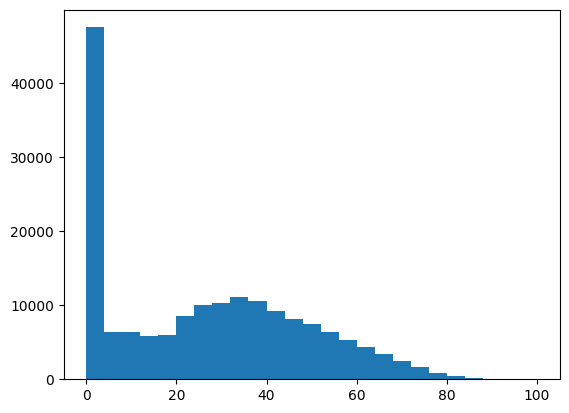

In [418]:
plt.hist(y, bins=25)

In [419]:
X.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,liveness,loudness,speechiness,tempo,...,valence_yr,popularity_yr,mode,key_0_yr,key_1_yr,key_2_yr,key_3_yr,key_4_yr,key_5_yr,key_6_yr
count,172230.000000,172230.000000,1.722300e+05,172230.000000,172230.000000,172230.000000,172230.000000,172230.000000,172230.000000,172230.000000,...,172230.000000,172230.000000,172230.0,172230.000000,172230.000000,172230.000000,172230.000000,172230.000000,172230.000000,172230.000000
mean,0.501914,0.536246,2.326718e+05,0.480989,0.067956,0.194968,0.211396,-11.777780,0.105896,116.937762,...,0.525269,25.711704,1.0,0.365111,0.058857,0.096325,0.052262,0.329356,0.092243,0.005847
std,0.379394,0.175858,1.471768e+05,0.272032,0.251670,0.332974,0.180661,5.690105,0.183053,30.290836,...,0.055638,15.219180,0.0,0.481463,0.235358,0.295037,0.222555,0.469981,0.289369,0.076241
min,0.000000,0.000000,4.937000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,...,0.378276,0.090909,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.091300,0.414000,1.662000e+05,0.248000,0.000000,0.000000,0.099300,-14.935750,0.035200,93.834000,...,0.478115,7.750543,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.523000,0.547000,2.057175e+05,0.463000,0.000000,0.000498,0.138000,-10.867000,0.045400,115.657000,...,0.538017,31.149276,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.896000,0.668000,2.656000e+05,0.708000,0.000000,0.238000,0.270000,-7.532000,0.076000,134.991000,...,0.563010,36.556552,1.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,0.996000,0.988000,5.338302e+06,1.000000,1.000000,1.000000,1.000000,3.855000,0.971000,243.507000,...,0.669676,50.873598,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [420]:
print(X.columns)

numeric_feats = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']
dummy_feats = [feat for feat in X.columns if feat not in numeric_feats]

print(X[numeric_feats])

Index(['acousticness', 'danceability', 'duration_ms', 'energy', 'explicit',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'year', 'key_0', 'key_1', 'key_2', 'key_3', 'key_4', 'key_5',
       'key_6', 'key_7', 'key_8', 'key_9', 'key_10', 'key_11', 'minor',
       'major', 'acousticness_ar', 'danceability_ar', 'duration_ms_ar',
       'energy_ar', 'instrumentalness_ar', 'liveness_ar', 'loudness_ar',
       'speechiness_ar', 'tempo_ar', 'valence_ar', 'popularity_ar', 'count',
       'key_0_ar', 'key_1_ar', 'key_2_ar', 'key_3_ar', 'key_4_ar', 'key_5_ar',
       'key_6_ar', 'key_7_ar', 'key_8_ar', 'key_9_ar', 'key_10_ar',
       'key_11_ar', 'minor_ar', 'major_ar', 'acousticness_yr',
       'danceability_yr', 'duration_ms_yr', 'energy_yr', 'instrumentalness_yr',
       'liveness_yr', 'loudness_yr', 'speechiness_yr', 'tempo_yr',
       'valence_yr', 'popularity_yr', 'mode', 'key_0_yr', 'key_1_yr',
       'key_2_yr', 'key_3_yr', 'key_4_yr', 'key_

<Axes: >

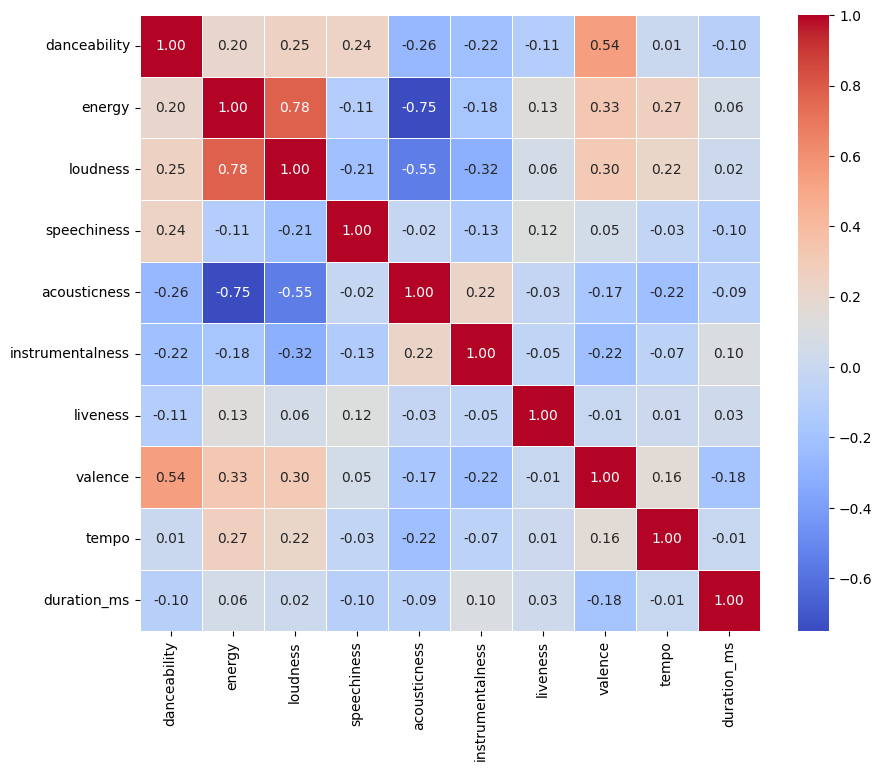

In [421]:
numeric_values = df[numeric_feats]
correlation_matrix = numeric_values.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

In [422]:
def model_evaluation(y_test, y_predicted, N, d):
    mse = mean_squared_error(y_test, y_predicted)
    mae = mean_absolute_error(y_test, y_predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_predicted)
    r2_adj = 1 - ((1 - r2) * (N - 1)) / (N - d - 1)

    # printing values
    print('Mean squared error: ', mse)
    print('Mean absolute error: ', mae)
    print('Root mean squared error: ', rmse)
    print('R2 score: ', r2)
    print('R2 adjusted score: ', r2_adj)

    # Uporedni prikaz nekoliko pravih i predvidjenih vrednosti
    res = pd.concat([pd.DataFrame(y_test.values),
                    pd.DataFrame(y_predicted)], axis=1)
    res.columns = ['y', 'y_pred']
    print(res.head(20))
    return mse, mae, rmse, r2, r2_adj

##### Scaling the data

In [423]:
s = StandardScaler()
s.fit(X_train[numeric_feats])
X_train_std = s.transform(X_train[numeric_feats])
X_test_std = s.transform(X_test[numeric_feats])
X_train_std = pd.DataFrame(X_train_std)
X_test_std = pd.DataFrame(X_test_std)

X_train_std = pd.concat([X_train_std, X_train[dummy_feats].reset_index(drop=True)], axis=1)
X_test_std = pd.concat([X_test_std, X_test[dummy_feats].reset_index(drop=True)], axis=1)

X_train_std.columns = list(X.columns)
X_test_std.columns = list(X.columns)
X_train_std.head()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,liveness,loudness,speechiness,tempo,...,valence_yr,popularity_yr,mode,key_0_yr,key_1_yr,key_2_yr,key_3_yr,key_4_yr,key_5_yr,key_6_yr
0,-0.558491,-0.062616,0.464918,-0.427005,0.733870,-0.586025,-0.279478,-0.897127,-0.330549,0.599954,...,0.545356,44.645782,1,0,0,0,0,1,0,0
1,1.329151,-0.709629,-0.465205,2.675894,1.189820,-0.586033,3.172283,1.345996,-1.243968,-1.057324,...,0.512847,0.221074,1,1,0,0,0,0,0,0
2,0.089675,0.488816,0.115639,-0.357118,-1.031946,1.994546,-0.705969,-0.269204,1.750931,-0.170220,...,0.538017,36.973094,1,1,0,0,0,0,0,0
3,-1.178229,0.308682,-0.232938,-0.395337,-1.160033,-0.585974,-0.473086,-1.358613,-0.266500,-0.146447,...,0.555559,42.348064,1,0,0,0,0,1,0,0
4,-0.694947,-1.356642,-1.422385,-0.390970,1.184548,-0.585757,-0.658950,-1.506138,0.434601,0.093228,...,0.593672,33.923039,1,0,0,1,0,0,0,0


In [424]:
# folds = KFold(n_splits=5, shuffle=True, random_state=42)
# hyper_params = [{'n_features_to_select': list(range(1, 16))}]

# lm = LinearRegression()
# lm.fit(X_train_std, y_train)
# rfe = RFE(lm)

# model_cv = GridSearchCV(
#     estimator=rfe,
#     param_grid=hyper_params,
#     scoring='r2',
#     cv=folds,
#     verbose=1,
#     return_train_score=True
# )

# model_cv.fit(X_train_std, y_train)
# cv_results = pd.DataFrame(model_cv.cv_results_)
# cv_results

In [425]:
# # plotting cv results
# plt.figure(figsize=(16,6))

# plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
# plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
# plt.xlabel('number of features')
# plt.ylabel('r-squared')
# plt.title("Optimal Number of Features")
# plt.legend(['test score', 'train score'], loc='upper left')

Optimal number of features is 13

In [426]:
# final model
n_features_optimal = 12

lrm = LinearRegression()
lrm.fit(X_train, y_train)

rfe = RFE(lrm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, y_train)

# predict prices of X_test
y_pred = lrm.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("r2:", r2)
print("mse", mse)

r2: 0.8298596707098379
mse 80.64295679395921


In [427]:
def standardizacija(x_train, x_test, numeric_feats, dummy_feats):
    # Save the original order of columns
    cols = x_train.columns
    
    # Standardize numeric features
    s = StandardScaler()
    s.fit(x_train[numeric_feats])
    
    x_train_std_numeric = s.transform(x_train[numeric_feats])
    x_test_std_numeric = s.transform(x_test[numeric_feats])
    
    x_train_std_numeric = pd.DataFrame(x_train_std_numeric, columns=numeric_feats)
    x_test_std_numeric = pd.DataFrame(x_test_std_numeric, columns=numeric_feats)

    # Concatenate standardized numeric features with dummy features
    x_train_std = pd.concat([x_train_std_numeric, x_train[dummy_feats]], axis=1)
    x_test_std = pd.concat([x_test_std_numeric, x_test[dummy_feats]], axis=1)

    return x_train_std_numeric, x_test_std_numeric

In [428]:
# from sklearn.model_selection import KFold
# from sklearn.metrics import mean_squared_error, r2_score

# # Define number of folds
# k = 5
# kf = KFold(n_splits=k, shuffle=True, random_state=42)

# # Initialize lists to store performance metrics
# mse_scores = []
# r2_scores = []

# model = Lasso(alpha=0.01)

# # Iterate over each fold
# for train_index, test_index in kf.split(X_train_std):
#     # Split data into train and test sets for this fold
#     X_train_fold, X_val_fold = X_train_std.iloc[train_index], X_train_std.iloc[test_index]
#     y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[test_index]

#     # Train your model on the training fold
#     model.fit(X_train_fold, y_train_fold)
    
#     # Make predictions on the validation fold
#     y_pred = model.predict(X_val_fold)
    
#     # Compute performance metrics for this fold
#     mse = mean_squared_error(y_val_fold, y_pred)
#     r2 = r2_score(y_val_fold, y_pred)
    
#     # Append scores to lists
#     mse_scores.append(mse)
#     r2_scores.append(r2)

# # Compute average performance metrics over all folds
# avg_mse = np.mean(mse_scores)
# avg_r2 = np.mean(r2_scores)

# print("Average MSE:", avg_mse)
# print("Average R-squared:", avg_r2)


##### Lasso with poly features

In [429]:
# poly = PolynomialFeatures(interaction_only=False, degree=2, include_bias=True)
# X_inter_train = poly.fit_transform(X_train_std)
# X_inter_test = poly.transform(X_test_std)
# out_feat_names = PolynomialFeatures.get_feature_names_out(
#     poly, input_features=None)

In [430]:
# X_train_std, X_test_std = standardizacija(X_train, X_test, numeric_feats, dummy_feats)
# poly = PolynomialFeatures(interaction_only=False, degree=3, include_bias=False)
# X_inter_train = poly.fit_transform(X_train_std)
# X_inter_test = poly.transform(X_test_std)

In [431]:
# # Inicijalizacija modela
# lm = Ridge(alpha=0.001)

# #Obuka
# lm.fit(X_train, y_train)

# # Testiranje
# y_predicted = lm.predict(X_test)

# # Evaluacija (racunanje mera uspesnosti)
# model_evaluation(y_test, y_predicted, X_train.shape[0], X_train.shape[1])

# # Ilustracija koeficijenata
# plt.figure(figsize=(10,5))
# plt.bar(range(len(lm.coef_)),lm.coef_)
# print("koeficijenti: ", lm.coef_)

In [432]:
# # Inicijalizacija modela
# rm = Ridge(alpha=5)

# #Obuka
# rm.fit(X_inter_train, y_train)

# # Testiranje
# y_predicted = rm.predict(X_inter_test)

# # Evaluacija (racunanje mera uspesnosti)
# model_evaluation(y_test, y_predicted, X_inter_train.shape[0], X_inter_train.shape[1])

# # Ilustracija koeficijenata
# plt.figure(figsize=(10,5))
# plt.bar(range(len(rm.coef_)),rm.coef_)
# print("koeficijenti: ", rm.coef_)

#### Poly set

In [433]:
# # Define polynomial features
# poly = PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)
# X_inter_train = poly.fit_transform(X_train_std)
# X_inter_test = poly.transform(X_test_std)

##### Lasso Poly + GridSearch


In [434]:
# # Define hyperparameter grid
# param_grid = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}

# # Instantiate Lasso regression model
# lasso = Lasso()

# # Instantiate GridSearchCV
# grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# # Fit grid search to training data
# grid_search.fit(X_inter_train, y_train)

# # Access best model and parameters
# best_model = grid_search.best_estimator_
# best_params = grid_search.best_params_

# # Evaluate best model on testing data
# y_pred = best_model.predict(X_inter_test)
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print("Best Model Parameters:", best_params)
# print("MSE:", mse)
# print("R-squared:", r2)

##### Ridge Poly + GridSearch

In [435]:
# # Define hyperparameter grid
# param_grid = {'alpha': [0.001, 0.01, 0.1, 1.0, 5, 10.0, 100.0]}

# # Instantiate ridge regression model
# ridge = Ridge()

# # Instantiate GridSearchCV
# grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# # Fit grid search to training data
# grid_search.fit(X_inter_train, y_train)

# # Access best model and parameters
# best_model = grid_search.best_estimator_
# best_params = grid_search.best_params_

# # Evaluate best model on testing data
# y_pred = best_model.predict(X_inter_test)
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print("Best Model Parameters:", best_params)
# print("MSE:", mse)
# print("R-squared:", r2)

##### SVR

In [436]:
# from sklearn.svm import SVR
# from sklearn.model_selection import GridSearchCV
# from sklearn.preprocessing import PolynomialFeatures, StandardScaler
# from sklearn.pipeline import make_pipeline
# from sklearn.metrics import mean_squared_error, r2_score
# # Define hyperparameter grid for SVR
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import uniform, randint

# # Define polynomial features
# # poly = PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)

# # Define SVR model
# svr = SVR(kernel='rbf')

# # Create a pipeline with polynomial features and SVR
# pipeline = make_pipeline(StandardScaler(), svr)


# # Define hyperparameter distributions for RandomizedSearchCV
# # param_dist = {
# #     'svr__C': uniform(0.001, 10),  # Example distribution for C
# #     'svr__gamma': ['scale', 'auto'],
# #     'svr__kernel': ['poly', 'rbf', 'sigmoid'],
# #     'svr__degree': randint(2, 5),  # Example distribution for degree
# #     'svr__epsilon': uniform(0.1, 0.4)  # Example distribution for epsilon
# # }

# # # Instantiate RandomizedSearchCV
# # random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=param_dist, n_iter=10,
# #                                    scoring='neg_mean_squared_error', cv=5, random_state=42, n_jobs=-1)

# # Fit randomized search to training dabta

# best_model = pipeline.fit(X_train, y_train)

# # # Access best model and parameters
# # best_model = random_search.best_estimator_
# # best_params = random_search.best_params_

# # Evaluate best model on testing data
# y_pred = best_model.predict(X_test)
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print("MSE:", mse)
# print("R-squared:", r2)

## Smanjenje dimenzionalnosti

### PCA

In [437]:
from sklearn.decomposition import PCA

In [438]:
#Do not uncomment if using Grid Search
# c = 10
# pca = PCA(n_components=c)

# df_names = [f'PCA_{i}' for i in range(c)]
# print(df_names)

# princ_components = pca.fit_transform(X)
# X = pd.DataFrame(data = princ_components, columns = df_names)
# print(X.shape)


#### Search for best parameters

In [439]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

pipeline = Pipeline([
    ('pca', PCA()), 
    ('lr', LinearRegression()) 
])


param_grid = {
    'pca__n_components': [1, 5, 10, 60, 65, 70, 71]  # Num of components to test
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, verbose=3, n_jobs=-1)

grid_search.fit(X, y)

print("Best parameters:", grid_search.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV 1/5] END ..............pca__n_components=1;, score=-0.021 total time=   2.7s
[CV 2/5] END ..............pca__n_components=1;, score=-0.002 total time=   3.2s
[CV 5/5] END ..............pca__n_components=1;, score=-0.016 total time=   3.2s
[CV 3/5] END ...............pca__n_components=1;, score=0.001 total time=   3.3s
[CV 4/5] END ..............pca__n_components=1;, score=-0.004 total time=   3.4s
[CV 2/5] END ...............pca__n_components=5;, score=0.258 total time=   4.2s
[CV 1/5] END ...............pca__n_components=5;, score=0.245 total time=   4.2s
[CV 3/5] END ...............pca__n_components=5;, score=0.236 total time=   4.2s
[CV 4/5] END ...............pca__n_components=5;, score=0.217 total time=   4.4s
[CV 1/5] END ..............pca__n_components=10;, score=0.842 total time=   4.4s
[CV 2/5] END ..............pca__n_components=10;, score=0.832 total time=   4.6s
[CV 3/5] END ..............pca__n_components=10;,

[CV 1/5] END ..............pca__n_components=60;, score=0.845 total time=  12.4s
[CV 3/5] END ..............pca__n_components=60;, score=0.829 total time=  13.6s
[CV 2/5] END ..............pca__n_components=60;, score=0.835 total time=  14.6s
[CV 4/5] END ..............pca__n_components=60;, score=0.819 total time=  14.3s
[CV 2/5] END ..............pca__n_components=65;, score=0.836 total time=  13.8s
[CV 5/5] END ..............pca__n_components=60;, score=0.814 total time=  15.7s
[CV 3/5] END ..............pca__n_components=65;, score=0.830 total time=  16.7s
[CV 1/5] END ..............pca__n_components=65;, score=0.846 total time=  17.9s
[CV 4/5] END ..............pca__n_components=65;, score=0.819 total time=  15.8s
[CV 5/5] END ..............pca__n_components=65;, score=0.814 total time=  15.6s
[CV 4/5] END ..............pca__n_components=70;, score=0.820 total time=  14.4s
[CV 1/5] END ..............pca__n_components=70;, score=0.846 total time=  16.5s
[CV 3/5] END ..............p

In [440]:
results = grid_search.cv_results_
param_values = results['param_pca__n_components'].data.astype(int)
mean_test_scores = results['mean_test_score']

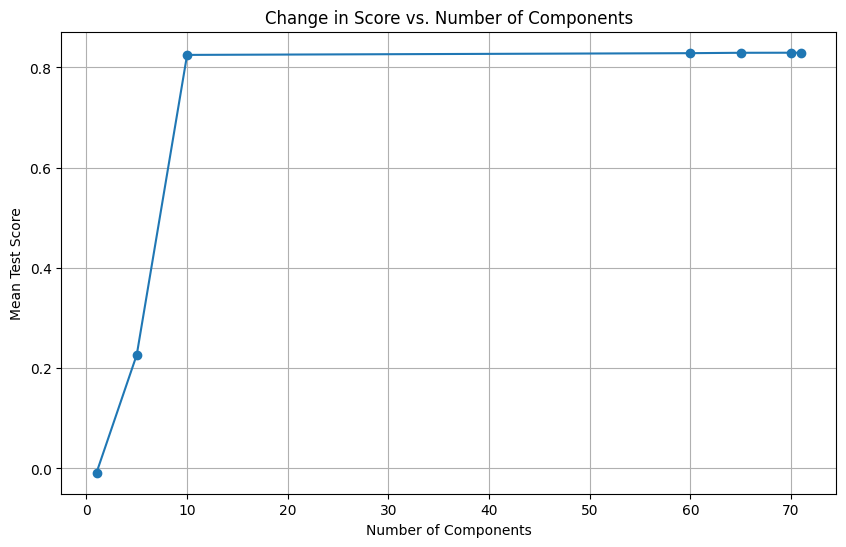

In [441]:
plt.figure(figsize=(10, 6))
plt.plot(param_values, mean_test_scores, marker='o')
plt.title('Change in Score vs. Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Mean Test Score')
plt.grid(True)
plt.show()